<a href="https://colab.research.google.com/github/marioyeahdude/marioyeahdude/blob/main/Crime_Incidence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Municipal Crime Incidence <img alt="Static Badge" src="https://img.shields.io/badge/ENG-blue?style=plastic">

**Project Objective:**
Analyze the evolution of crime in Mexico by state and type of crime in order to identify relevant trends between 2015 and 2025.

---

# Incidencia Delictiva Municipal <img alt="Static Badge" src="https://img.shields.io/badge/SPA-red?style=plastic">

**Objetivo del proyecto:**
Analizar la evolución de los delitos en México por estado y tipo de delito para identificar tendencias relevantes entre 2015 y 2025.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/IDM_NM_dic25.csv", encoding='latin-1')

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562994 entries, 0 to 2562993
Data columns (total 21 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Año                     int64 
 1   Clave_Ent               int64 
 2   Entidad                 object
 3   Cve. Municipio          int64 
 4   Municipio               object
 5   Bien jurídico afectado  object
 6   Tipo de delito          object
 7   Subtipo de delito       object
 8   Modalidad               object
 9   Enero                   int64 
 10  Febrero                 int64 
 11  Marzo                   int64 
 12  Abril                   int64 
 13  Mayo                    int64 
 14  Junio                   int64 
 15  Julio                   int64 
 16  Agosto                  int64 
 17  Septiembre              int64 
 18  Octubre                 int64 
 19  Noviembre               int64 
 20  Diciembre               int64 
dtypes: int64(15), object(6)
memory usage: 410.6+ MB


,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,1,1,0,1,1,0,2,1,0,1
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,0,0,1,0,1,0,0,0,0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,1,3,2,0,1,2,0,0,0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,...,0,1,0,0,0,0,0,0,0,0
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,1,0,0,0,0,0,0,0


<img alt="Static Badge" src="https://img.shields.io/badge/ENG-blue?style=plastic"> The dataset contains records of crime incidence in Mexico by **year**, **state and municipality**, and **type, subtype, and modality of crime**.
Each record includes the number of crimes reported per month.

---

<img alt="Static Badge" src="https://img.shields.io/badge/SPA-red?style=plastic"> El dataset contiene registros de incidencia delictiva en México por **año**, **entidad y municipio** y **tipo, subtipo y modalidad del delito**.
Cada registro incluye el número de delitos reportados por mes.



In [ ]:
df.isnull().sum()

,0
Año,0
Clave_Ent,0
Entidad,0
Cve. Municipio,0
Municipio,0
Bien jurídico afectado,0
Tipo de delito,0
Subtipo de delito,0
Modalidad,0
Enero,0


In [ ]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace(".", "")
      .str.replace("í", "i")
)

df.columns

Index(['año', 'clave_ent', 'entidad', 'cve_municipio', 'municipio',
       'bien_juridico_afectado', 'tipo_de_delito', 'subtipo_de_delito',
       'modalidad', 'enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
       'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'],
      dtype='object')

In [ ]:
meses = [
    'enero','febrero','marzo','abril','mayo','junio',
    'julio','agosto','septiembre','octubre','noviembre','diciembre'
]

df['total_anual'] = df[meses].sum(axis=1)

df[['año','entidad','tipo_de_delito','total_anual']].head()

,año,entidad,tipo_de_delito,total_anual
0,2015,Aguascalientes,Homicidio,10
1,2015,Aguascalientes,Homicidio,4
2,2015,Aguascalientes,Homicidio,10
3,2015,Aguascalientes,Homicidio,2
4,2015,Aguascalientes,Homicidio,1


In [ ]:
df.groupby('año')['total_anual'].sum()

,total_anual
año,
2015,1657804
2016,1764179
2017,1939495
2018,1989928
2019,2071181
2020,1841191
2021,2044255
2022,2141988
2023,2173522


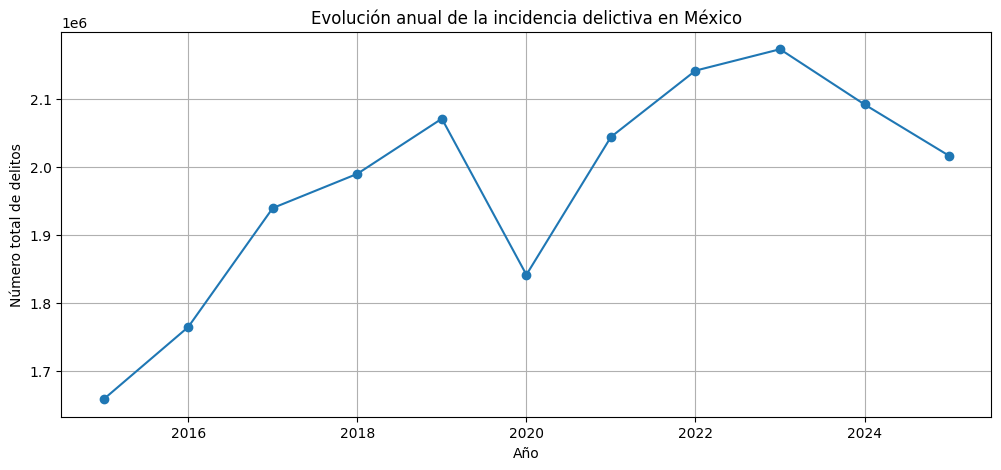

In [ ]:
delitos_anuales = df.groupby('año')['total_anual'].sum()

plt.figure(figsize=(12,5))
plt.plot(delitos_anuales.index, delitos_anuales.values, marker="o")
plt.title('Evolución anual de la incidencia delictiva en México')
plt.xlabel('Año')
plt.ylabel('Número total de delitos')
plt.grid(True)
plt.show()

<img alt="Static Badge" src="https://img.shields.io/badge/ENG-blue?style=plastic"> A steady increase in the total number of reported crimes is observed between 2015 and 2019.

A significant drop occurred in 2020, possibly associated with reduced mobility during the COVID-19 pandemic.

From 2021 onward, the incidence rises again, reaching its peak in 2023. Data from 2024 and 2025, interestingly, show a slight decrease.

---

<img alt="Static Badge" src="https://img.shields.io/badge/SPA-red?style=plastic"> Se observa un crecimiento constante en el número total de delitos registrados entre 2015 y 2019.

En 2020 ocurre una caída significativa, posiblemente asociada
a la reducción de movilidad durante la pandemia de COVID-19.

A partir de 2021, la incidencia vuelve a incrementarse, alcanzando su punto
máximo en 2023. Los datos de 2024 y 2025 muestran una ligera disminución.

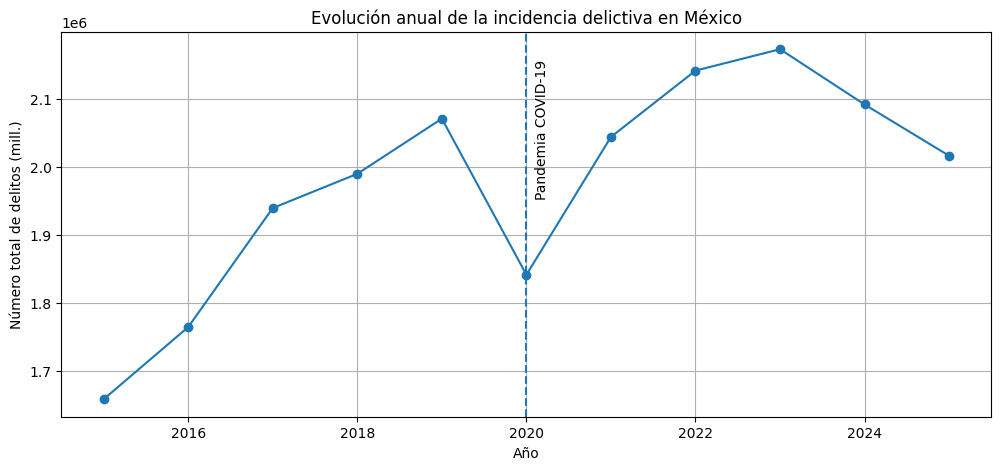

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(delitos_anuales.index, delitos_anuales.values, marker='o')
plt.axvline(2020, linestyle='--')
plt.text(2020.1, delitos_anuales.max()*0.9, 'Pandemia COVID-19', rotation=90)
plt.title('Evolución anual de la incidencia delictiva en México')
plt.xlabel('Año')
plt.ylabel('Número total de delitos (mill.)')
plt.grid(True)
plt.show()

In [ ]:
df.groupby('entidad')['total_anual'].sum().sort_values(ascending=False).head(10)

,total_anual
entidad,
México,3924507
Ciudad de México,2359144
Jalisco,1471946
Guanajuato,1458047
Baja California,1168206
Nuevo León,940805
Veracruz de Ignacio de la Llave,802024
Chihuahua,768450
Puebla,762193


<img alt="Static Badge" src="https://img.shields.io/badge/ENG-blue?style=plastic"> The State of Mexico has the highest number of reported crimes during the analyzed period, followed by Mexico City. This concentration may be related to its population density and urban activity.

---

<img alt="Static Badge" src="https://img.shields.io/badge/SPA-red?style=plastic"> El Estado de México concentra el mayor número de delitos registrados en el periodo analizado, seguido por la Ciudad de México. Esta concentración puede estar relacionada con su densidad poblacional y actividad urbana.

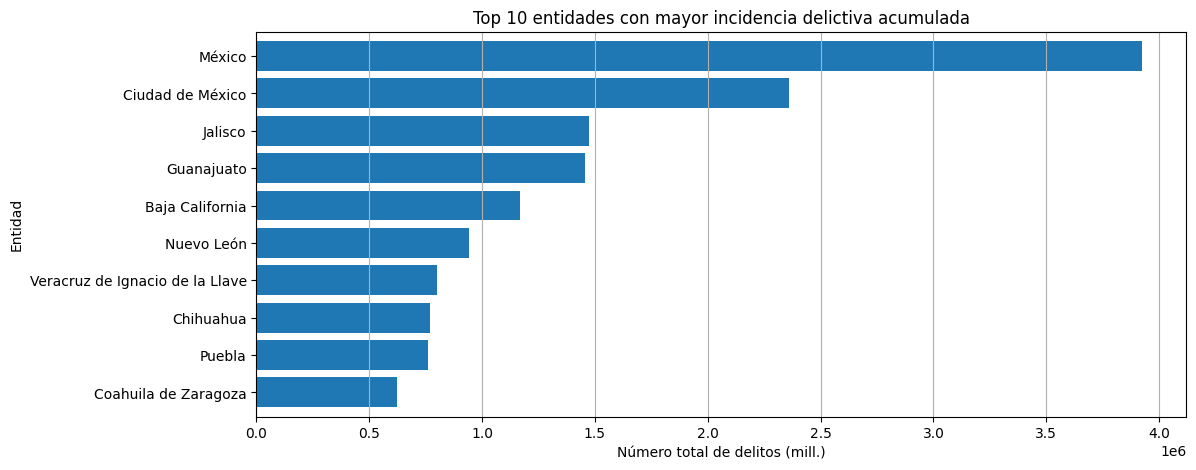

In [ ]:
top10_entidades = (
    df.groupby('entidad')['total_anual']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(12,5))
top10_entidades.plot(kind='barh', width=0.8)
plt.title('Top 10 entidades con mayor incidencia delictiva acumulada')
plt.xlabel('Número total de delitos (mill.)')
plt.ylabel('Entidad')
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.show()

In [ ]:
entidades_interes = ['México', 'Ciudad de México', 'Jalisco']

df_filtrado = df[df['entidad'].isin(entidades_interes)]

evolucion = (
    df_filtrado
    .groupby(['año','entidad'])['total_anual']
    .sum()
    .reset_index()
)

evolucion.head()

,año,entidad,total_anual
0,2015,Ciudad de México,169701
1,2015,Jalisco,95331
2,2015,México,323525
3,2016,Ciudad de México,179720
4,2016,Jalisco,136820


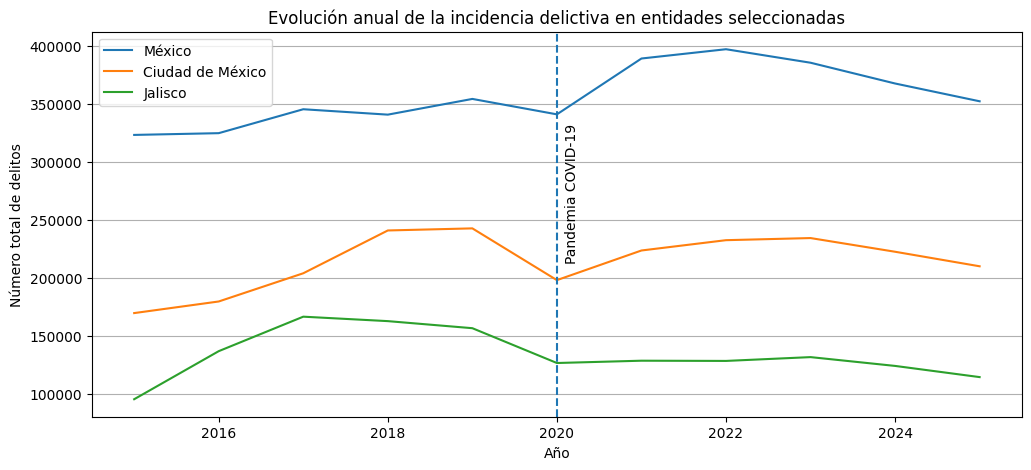

In [ ]:
plt.figure(figsize=(12,5))

for entidad in entidades_interes:
    data = evolucion[evolucion['entidad'] == entidad]
    plt.plot(
        data['año'],
        data['total_anual'],
        label=entidad
    )

plt.axvline(2020, linestyle='--')
plt.text(2020.1, 215000, 'Pandemia COVID-19', rotation=90)
plt.title('Evolución anual de la incidencia delictiva en entidades seleccionadas')
plt.xlabel('Año')
plt.ylabel('Número total de delitos')
plt.legend()
plt.grid(True, axis='y')
plt.show()

<img alt="Static Badge" src="https://img.shields.io/badge/ENG-blue?style=plastic"> Comparing the evolution of crime rates in the State of Mexico, Mexico City, and Jalisco, the data shows the State of Mexico maintains the highest levels throughout the analyzed period.

Mexico City shows a relatively stable trend, with the steepest decrease of the three entities in 2020.

Meanwhile, Jalisco shows a faster increase from 2015 to 2017 and, after the decrease in 2020, has remained stable.

---

<img alt="Static Badge" src="https://img.shields.io/badge/SPA-red?style=plastic"> Al comparar la evolución de la incidencia delictiva entre el Estado de México, Ciudad de México y Jalisco, se observa que el Estado de México mantiene los niveles más altos durante todo el periodo analizado.

La Ciudad de México presenta una tendencia relativamente estable, con la
disminución del 2020 más marcada de las tres entidades.

Mientras que Jalisco muestra un crecimiento más acelerado del 2015 al 2017 y, después de la disminución del 2020, se mantiene estable.

In [ ]:
df_long = df.melt(
    id_vars=[
        'año','entidad','municipio','tipo_de_delito',
        'subtipo_de_delito','modalidad'
    ],
    value_vars=meses,
    var_name='mes',
    value_name='delitos'
)

df_long.head()

,año,entidad,municipio,tipo_de_delito,subtipo_de_delito,modalidad,mes,delitos
0,2015,Aguascalientes,Aguascalientes,Homicidio,Homicidio doloso,Con arma de fuego,enero,2
1,2015,Aguascalientes,Aguascalientes,Homicidio,Homicidio doloso,Con arma blanca,enero,1
2,2015,Aguascalientes,Aguascalientes,Homicidio,Homicidio doloso,Con otro elemento,enero,0
3,2015,Aguascalientes,Aguascalientes,Homicidio,Homicidio doloso,No especificado,enero,1
4,2015,Aguascalientes,Aguascalientes,Homicidio,Homicidio culposo,Con arma de fuego,enero,0


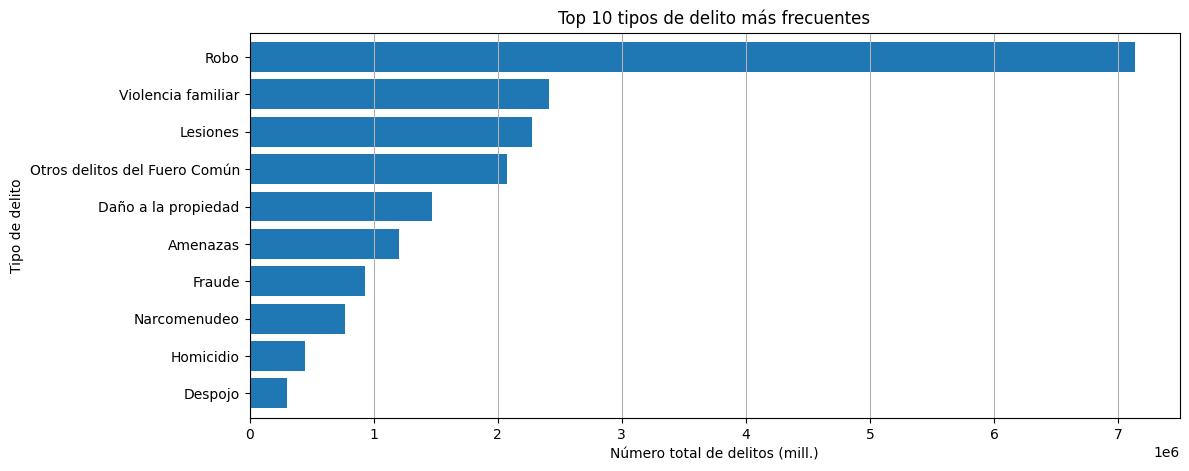

In [ ]:
top_delitos = (
    df.groupby('tipo_de_delito')['total_anual']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,5))
top_delitos.plot(kind='barh', width=0.8)
plt.title('Top 10 tipos de delito más frecuentes')
plt.ylabel('Tipo de delito')
plt.xlabel('Número total de delitos (mill.)')
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.show()

<img alt="Static Badge" src="https://img.shields.io/badge/ENG-blue?style=plastic"> The analysis by type of crime shows that **theft** accounts for the majority of the records, allowing for prioritization of areas of attention and more detailed analysis in future studies.

---

<img alt="Static Badge" src="https://img.shields.io/badge/SPA-red?style=plastic"> El análisis por tipo de delito muestra que el **robo** concentra la mayor parte de los registros, lo que permite priorizar áreas de atención y análisis más detallado en futuros estudios.

In [ ]:
heatmap_data = (
    df_long
    .groupby(['año','mes'])['delitos']
    .sum()
    .reset_index()
)

heatmap_data

,año,mes,delitos
0,2015,abril,137645
1,2015,agosto,139416
2,2015,diciembre,130698
3,2015,enero,129151
4,2015,febrero,130311
...,...,...,...
127,2025,marzo,176089
128,2025,mayo,174359
129,2025,noviembre,158455
130,2025,octubre,178272


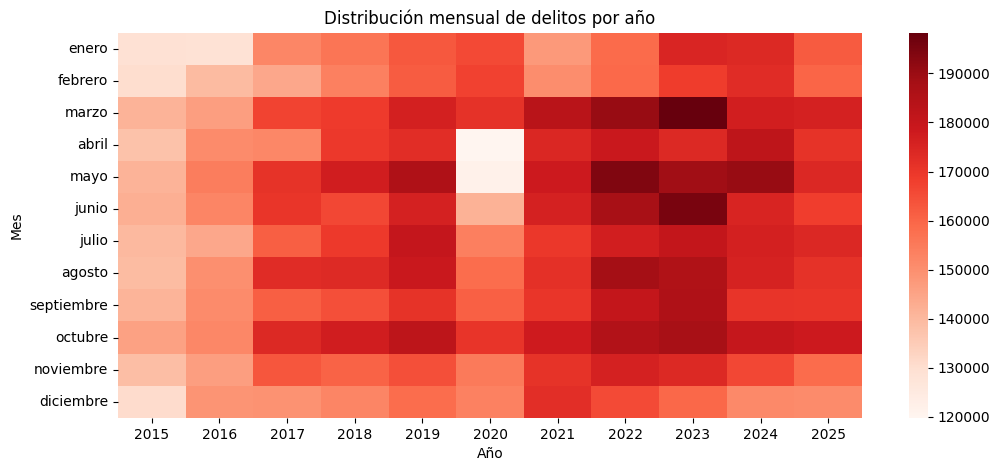

In [ ]:
heatmap_pivot = heatmap_data.pivot(
    index='mes',
    columns='año',
    values='delitos'
)
heatmap_pivot = heatmap_pivot.reindex(meses)

plt.figure(figsize=(12,5))
sns.heatmap(heatmap_pivot, cmap='Reds')
plt.title('Distribución mensual de delitos por año')
plt.xlabel('Año')
plt.ylabel('Mes')
plt.show()

<img alt="Static Badge" src="https://img.shields.io/badge/ENG-blue?style=plastic"> The monthly analysis shows slight seasonal patterns. Incidents decrease slightly at the end of the year and tend to peak between the first and second quarters, suggesting cyclical behavior in crime rates.

---

<img alt="Static Badge" src="https://img.shields.io/badge/SPA-red?style=plastic"> El análisis mensual muestra ligeros patrones de estacionalidad. Las incidencias descienden ligeramente a finales de año y suelen tener picos entre el primer y segundo trimestre del año, lo que sugiere comportamientos cíclicos en la incidencia delictiva.

## General Conclusions <img alt="Static Badge" src="https://img.shields.io/badge/ENG-blue?style=plastic">

This project allowed for the analysis of crime rates in Mexico from a temporal, geographical, and crime-type perspective, using open government data.

The analysis reveals clear trends over time, significant regional differences, and recurring monthly patterns, demonstrating the value of data analysis for understanding complex social phenomena.

---

## Conclusiones Generales <img alt="Static Badge" src="https://img.shields.io/badge/SPA-red?style=plastic">

Este proyecto permitió analizar la incidencia delictiva en México desde una perspectiva temporal, geográfica y por tipo de delito, utilizando datos abiertos gubernamentales.

El análisis evidencia tendencias claras a lo largo del tiempo, diferencias regionales significativas y patrones mensuales recurrentes, demostrando el valor del análisis de datos para comprender fenómenos sociales complejos.